# 隨機森林 (Random Forest)

隨機森林是一種集成學習方法，透過結合多顆決策樹來進行預測。它是由 **Bagging**（Bootstrap Aggregating）技術所衍生，能夠有效地減少過度擬合（overfitting）並提高預測準確度。

## 主要特點
- **集成學習方法**：結合多顆決策樹的預測結果。
- **隨機性**：每顆樹的生成過程中使用隨機抽樣的特徵和樣本，增加多樣性。
- **高準確度**：相比單顆決策樹，隨機森林在大多數情況下能提供更好的準確性。
- **抗過度擬合**：通過集成多個模型來減少過度擬合的風險。

## 工作原理
1. **資料抽樣**：
   - 從訓練資料中隨機抽取多個子集（有放回抽樣，稱為 Bootstrap）。
2. **建構多顆決策樹**：
   - 每顆樹使用不同的資料子集和隨機選擇的特徵來建立。
3. **預測與投票**：
   - 每顆樹獨立進行預測，對分類問題使用多數投票法，對回歸問題使用平均值。

## 優點
- **高準確度**：能夠處理大量資料並保持高效的準確度。
- **不易過度擬合**：集成多顆樹的結果有助於防止過度擬合。
- **能處理缺失資料**：即使某些資料缺失，隨機森林依然可以有效運作。
- **適用於高維度資料**：隨機森林能夠有效處理擁有大量特徵的資料集。

## 缺點
- **計算開銷**：訓練多顆樹需要大量計算資源和時間。
- **模型解釋性差**：由於多顆樹結合，隨機森林的模型較難解釋。

## 應用範圍
- **分類問題**：例如圖像識別、醫療診斷。
- **回歸問題**：例如預測房價、銷售額等。
- **特徵選擇**：利用隨機森林中的特徵重要性來選擇最具代表性的特徵。

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
iris = datasets.load_iris()
# iris

In [18]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [19]:
rfc1 = RandomForestClassifier(n_estimators=100, random_state=33).fit(X_train, y_train)

#### 經測試樹的大小超過100時，似乎已經不會有更好的效果，反而會造成效能降低，因此決定100棵樹

In [20]:
rfc1.predict(X_test)

array([1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0,
       2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       0])

In [21]:
rfc1.score(X_test, y_test)

0.9333333333333333

### 加入更多參數，試試看預測效果會不會更好

- **`n_jobs = -1`**
  - 控制計算時使用的 CPU 核心數量：
    - `-1`：使用所有可用的核心，最大化計算速度。
    - 正整數：指定使用的核心數（例如 `n_jobs=4` 使用 4 個核心）。
    - 如果使用單核 CPU，可以將其設置為默認值 `None`。

- **`min_samples_leaf = 3`**
  - 表示每個葉節點上至少需要有 3 個樣本，這是一個正則化參數：
    - 可以防止葉節點過於純粹（避免過擬合）。
    - 增加此值會讓模型更加平滑，但可能降低模型對細節的捕捉能力。
    - 適合用於樣本量較大的數據集。

In [22]:
rfc2 = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_leaf=3, random_state=33).fit(X_train, y_train)

In [23]:
rfc2.predict(X_test)

array([1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0,
       2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       0])

In [24]:
rfc2.score(X_test, y_test)

0.9555555555555556

### 增加更多參數後，預測結果 <span style="color:red;">**提升2%**</span>

## 特徵重要性分析

In [25]:
imp1 = rfc1.feature_importances_
imp2 = rfc2.feature_importances_
print(f"特徵重要性分析 = {imp1}")
print(f"特徵重要性分析(多參數） = {imp2}")

特徵重要性分析 = [0.10207007 0.01574396 0.44633868 0.43584729]
特徵重要性分析(多參數） = [0.09505325 0.01052602 0.44943671 0.44498403]


In [26]:
feature_name = iris.feature_names
df = pd.DataFrame(
    {
        'Feature Name': feature_name,
        'Model 1 Importance':imp1,
        'Model 2 Importance':imp2   
    }
)
df

,Feature Name,Model 1 Importance,Model 2 Importance
0,sepal length (cm),0.102070,0.095053
1,sepal width (cm),0.015744,0.010526
2,petal length (cm),0.446339,0.449437
3,petal width (cm),0.435847,0.444984


### 重要性分析視覺化

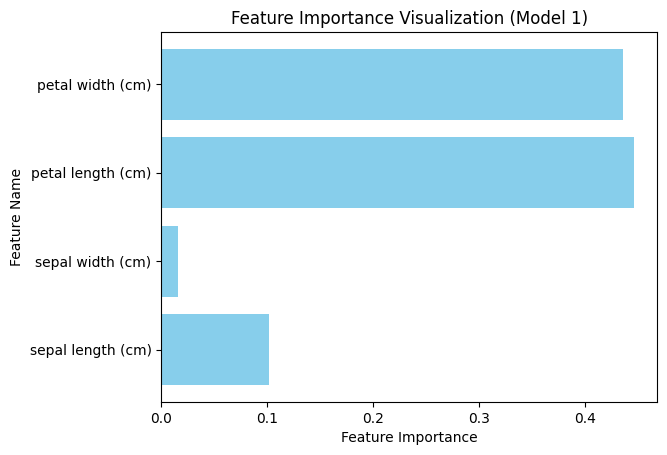

In [27]:
# model 1 的特徵重要性分析視覺化
plt.barh(iris.feature_names, rfc1.feature_importances_, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Visualization (Model 1)')
plt.show()

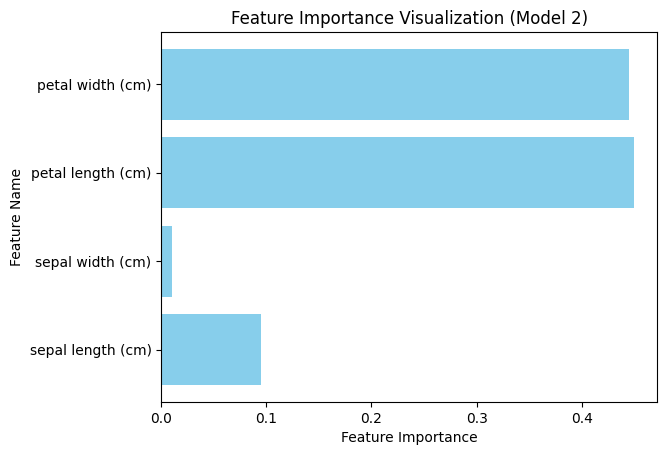

In [28]:
# model 2 的特徵重要性分析視覺化
plt.barh(iris.feature_names, rfc2.feature_importances_, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Visualization (Model 2)')
plt.show()

### **特徵重要性結論**
兩個模型都顯示 <span style="color:red;"> "sepal width"(花萼寬度)</span>此特徵對於模型的<span style="color:red;">貢獻度最低</span>，而 <span style="color:red;">"petal width"、"petal length"(花瓣寬、花瓣長)</span>相對來說是<span style="color:red;">重要的特徵</span>。